## Wk5 Assignment

## Lincoln Brown

## DSC550-T302

## Professor Werner


In [110]:
# Import libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 1: Get the Stemmed Data
Get the stemmed data using the same process you did in Week 3 


In [2]:
# Import the data
f_name = "labeledTrainData.tsv"

df = pd.read_csv(f_name, delimiter='\t')

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")


There are 25000 rows and 3 columns


In [3]:
nltk_df = df.copy()
nltk_df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [4]:
nltk_reviews = nltk_df['review'].values
len(nltk_reviews)

25000

## Cleaning Function Goals:
<ul>
    <li>Convert all words to lowercase</li>
    <li>Remove punctuation and special characters</li>
    <li>Remove stop words</li>
</ul>


In [5]:
# Let's make a function to clean up the text
def clean_text(text):
    stop_words = stopwords.words('english')
    # Remove punctuation and special characters
    pattern = r'([A-Za-z]*)'
    pattern = re.compile(pattern)
    cleaned = pattern.findall(text)
    # Convert to lower case
    words = [word.lower() for word in cleaned if word]     
    words = [word.lower() for word in words if word not in stop_words]
    return words

In [6]:
# Test clean_text function
x = nltk_df.loc[0,'review']
test_clean = clean_text(nltk_reviews[0])
test_clean

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'br',
 'br',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'br',
 'br',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'e

In [7]:
nltk_df['clean_review'] = nltk_df['review'].apply(clean_text)
nltk_df

,id,sentiment,review,clean_review
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[classic, war, worlds, timothy, hines, enterta..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, starts, manager, nicholas, bell, giving..."
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ..."
...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,"[seems, like, consideration, gone, imdb, revie..."
24996,5064_1,0,I don't believe they made this film. Completel...,"[believe, made, film, completely, unnecessary,..."
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...","[guy, loser, get, girls, needs, build, picked,..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,"[minute, documentary, bu, uel, made, early, on..."


In [10]:
# Create a stemmer
porter = PorterStemmer()

nltk_df['stemmed_review'] = nltk_df['clean_review'].apply(lambda word_list: [porter.stem(word) for word in word_list])
nltk_df['stemmed_review'] = nltk_df['stemmed_review'].apply(lambda word: ' '.join(word))

In [9]:
nltk_df

,id,sentiment,review,clean_review,stemmed_review
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...",stuff go moment mj start listen music watch od...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[classic, war, worlds, timothy, hines, enterta...",classic war world timothi hine entertain film ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, starts, manager, nicholas, bell, giving...",film start manag nichola bell give welcom inve...
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...",must assum prais film greatest film opera ever...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ...",superbl trashi wondrous unpretenti exploit hoo...
...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,"[seems, like, consideration, gone, imdb, revie...",seem like consider gone imdb review film went ...
24996,5064_1,0,I don't believe they made this film. Completel...,"[believe, made, film, completely, unnecessary,...",believ made film complet unnecessari first fil...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...","[guy, loser, get, girls, needs, build, picked,...",guy loser get girl need build pick stronger su...
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,"[minute, documentary, bu, uel, made, early, on...",minut documentari bu uel made earli one spain ...


## Step 2: Split into training and test sets
Split this into a training and test set.

In [14]:
X = nltk_df['stemmed_review']
y = nltk_df['sentiment']

#Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


## Step 3: Fit and Apply the tf-idf Vectorization to the Training Set

In [16]:
# Create tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

## Step 4: Transform the Test Set
Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

We need to transform the test set using the tf-idf vectorizer, but we do not want to fit to the test set because it could cause data leakage. Data leakage could mean that since our vectorizer was fitted to the test data, it is not necessarily new, unseen data. This could lead to overly optimistic model performance. 

In [21]:
# Transform the test set using the same vectorizer, but do not fit
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Step 5: Train a logistic regression using the training data.

In [24]:
# Create a Logistic Regression object
logistic_regression = LogisticRegression(random_state=10)

In [26]:
# Train the logistic regression model
log_reg_model = logistic_regression.fit(X_train_tfidf, y_train)

## Step 6: Find the model accuracy on test set.

In [28]:
# Make predictions on the test set to find the accuracy
lr_predictions = log_reg_model.predict(X_test_tfidf)

In [35]:
# Calculate accuracy score on test set
acc_score = accuracy_score(y_test, lr_predictions)
print(f"Accuracy score: {acc_score:.2%}")

Accuracy score: 89.38%


## Step 7: Create a confusion matrix


In [58]:
labels = "Negative", "Positive"
conf_matrix = confusion_matrix(y_test, lr_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

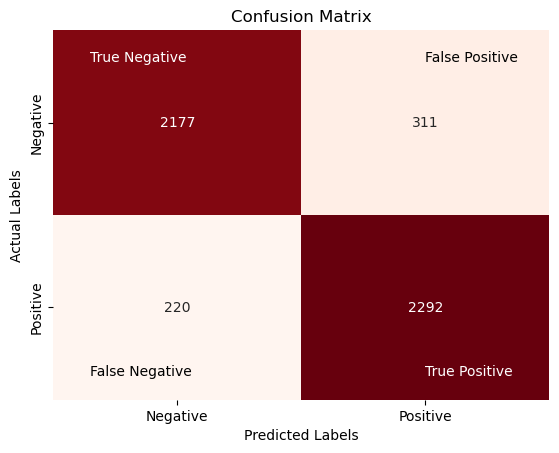

In [105]:
sns.heatmap(conf_matrix_df, fmt='d', annot=True, cbar=None, cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.text(.15,.15, 'True Negative', va='center', color='white')
plt.text(1.5,1.85, 'True Positive', va='center', color='white')
plt.text(.15, 1.85, 'False Negative', va='center', color='black')
plt.text(1.5,.15, 'False Positive', va='center', color='black')
plt.show()

## Step 8: Get the precision, recall, and F1-score for the test set predictions

In [109]:
class_report = classification_report(y_test, lr_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2488
           1       0.88      0.91      0.90      2512

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



## Step 9: Create a ROC curve for the test set.

In [111]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predictions)

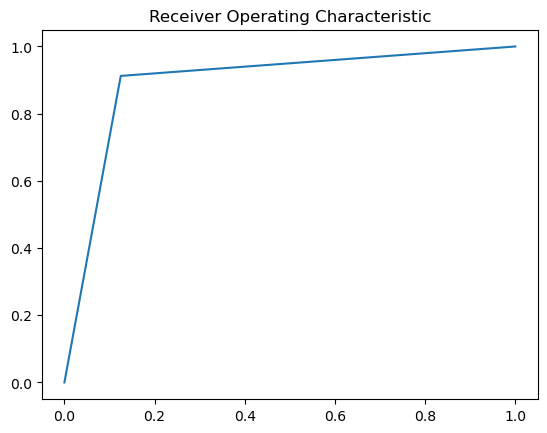

In [112]:
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)